<a href="https://colab.research.google.com/github/akifkashif/EDA-Capstone-Project---Mohammed-Akifuddin/blob/main/TEAM_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [5]:
import numpy as np
import pandas as pd
from numpy import math

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [158]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.describe()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [183]:
numeric_features= list(df.describe().columns)
numeric_features.remove('Area code')
type(numeric_features)

list

In [184]:
print(numeric_features)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [12]:
df["Area code"].unique()

array([415, 408, 510])

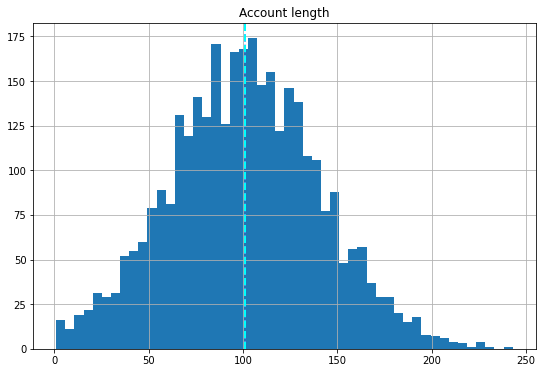

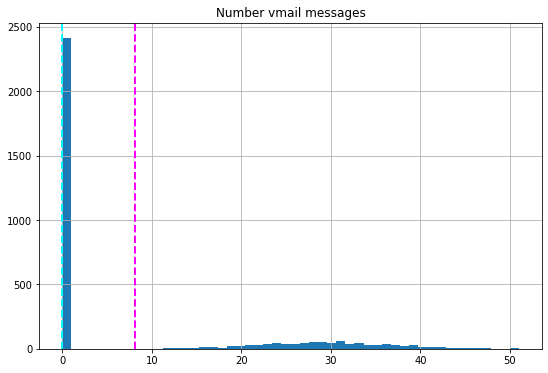

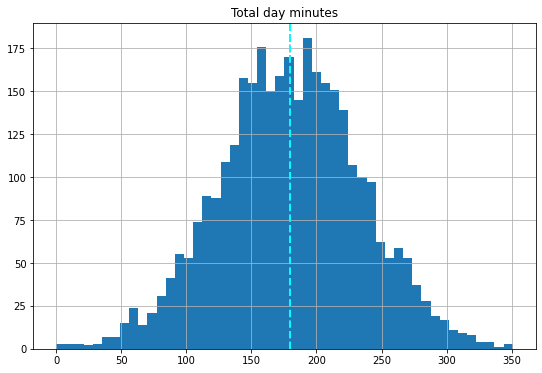

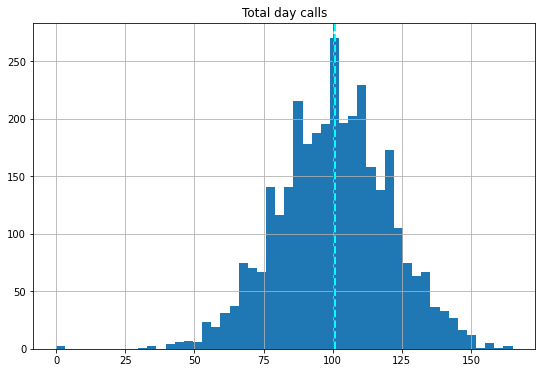

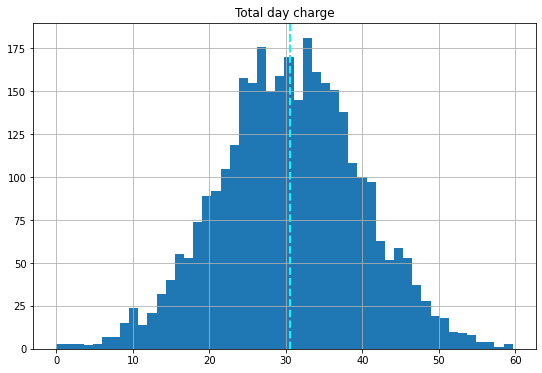

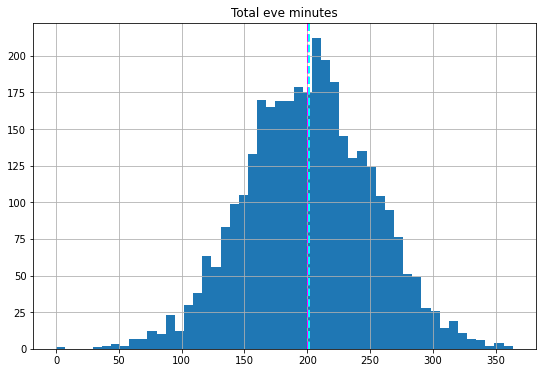

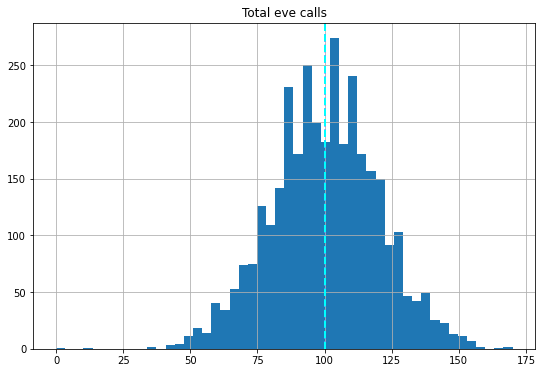

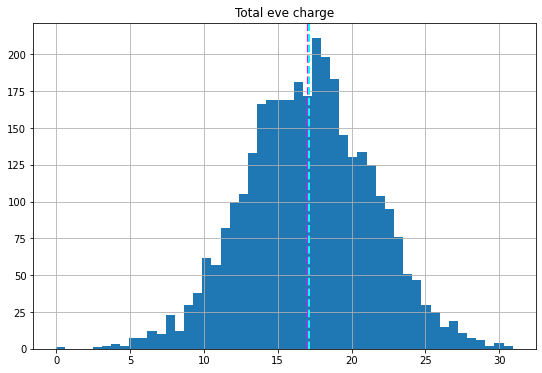

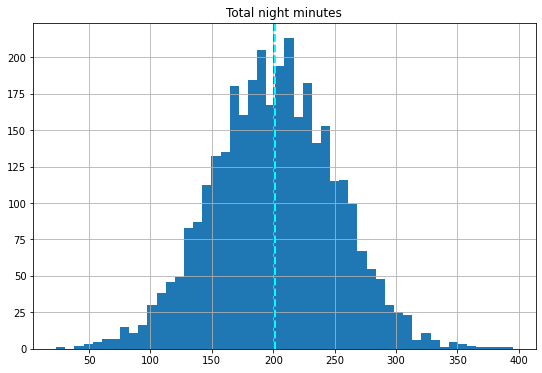

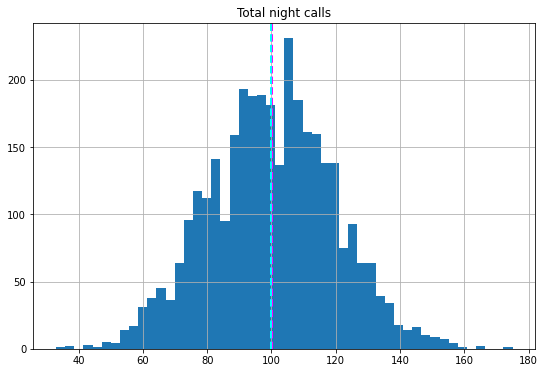

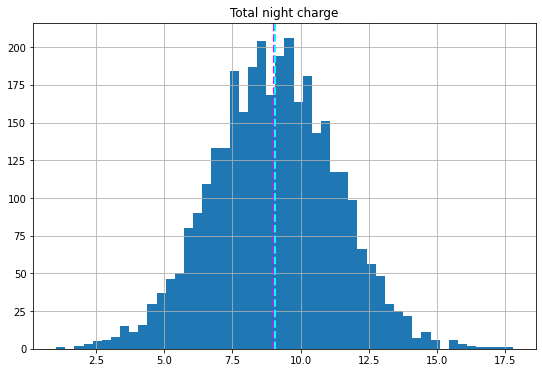

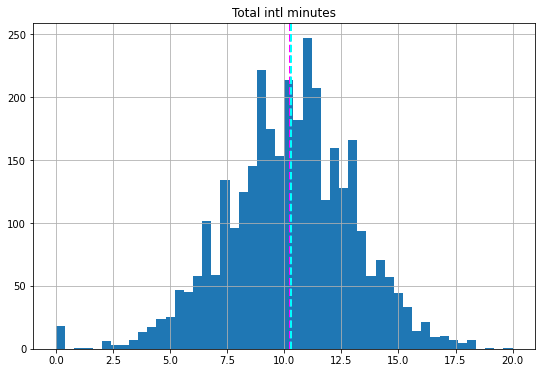

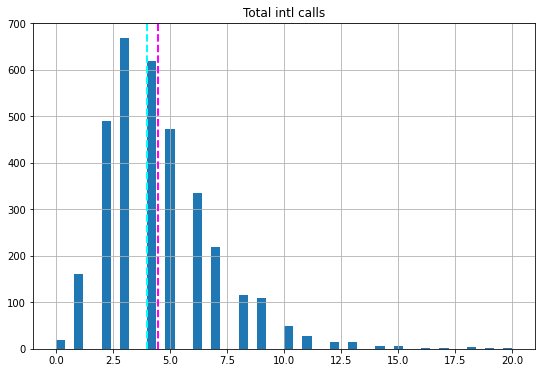

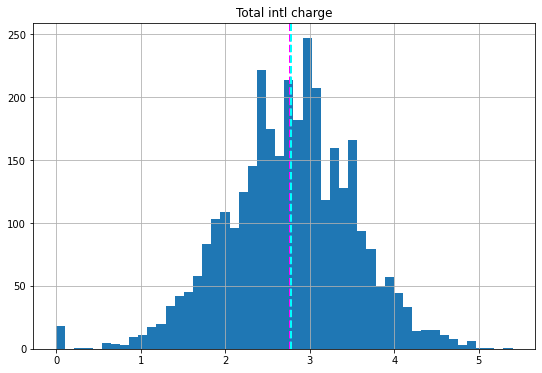

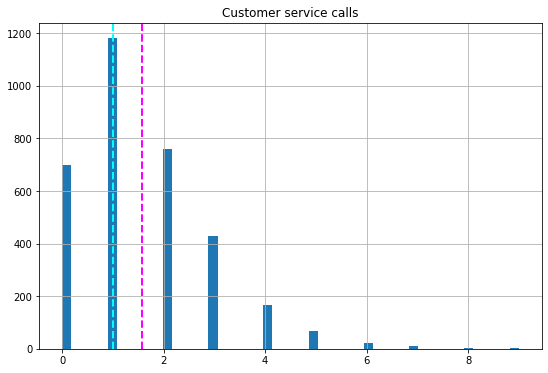

In [186]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

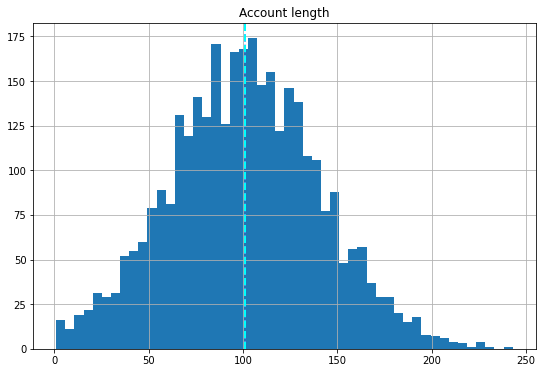

In [16]:

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df["Account length"]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title('Account length')
plt.show()

In [17]:
# Create dummy variables for the catgeorical variable State
df['Area code_415'] = np.where(df['Area code']== 415, 1, 0)
df['Area code_408'] = np.where(df['Area code']== 408, 1, 0)
df['Area code_510'] = np.where(df['Area code']== 510, 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['Area code'],axis=1,inplace=True)

In [18]:
df.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area code_415,Area code_408,Area code_510
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,1,0,0
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,1,0,0
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,1,0,0
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,0,1,0
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,1,0,0


In [257]:
df1= df.copy()

In [258]:
df1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [259]:
df1 = pd.get_dummies(
    df1, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=["State" ,'International plan' ,'Voice mail plan', 'Churn' ], 
    sparse=False, 
    drop_first=False, 
    dtype=None,
  
)


In [260]:
df1.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,1,1,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,1,1,0,1,0


In [261]:
df1

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,0,0,1,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,0,1,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,1,1,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0,0,0,0,1,0,0,1,1,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0,0,1,0,1,0,1,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0,0,0,0,1,0,1,0,1,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,0,0,0,0,0,1,1,0,1,0


In [73]:
df1. fillna(value=df1. mean(), inplace=True)

In [74]:
df1.replace('?', np.nan)

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Churn_False,Churn_True
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,1,1,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,1,0,0,1,1,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,1,0,1,0,1,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,1,0,1,0,1,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,1,1,0,1,0


In [59]:
df1.isna().sum()

Account length            0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
                         ..
International plan_Yes    0
Voice mail plan_No        0
Voice mail plan_Yes       0
Churn_False               0
Churn_True                0
Length: 75, dtype: int64

In [51]:
df2 =df[df.describe().columns]

In [103]:
df.describe().columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Area code_415', 'Area code_408', 'Area code_510'],
      dtype='object')

In [29]:
df2.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_408,Area code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


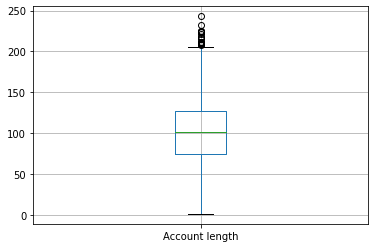

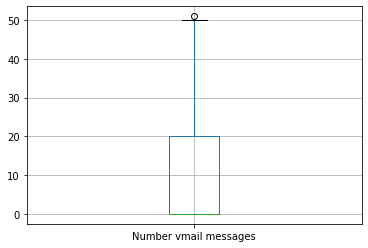

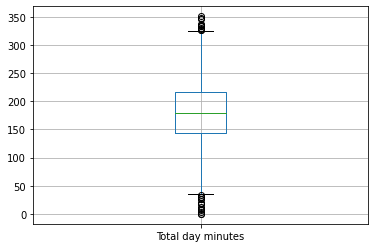

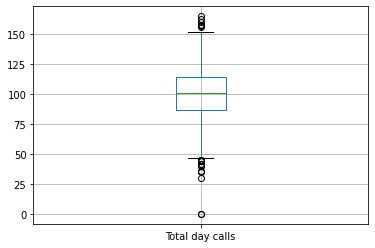

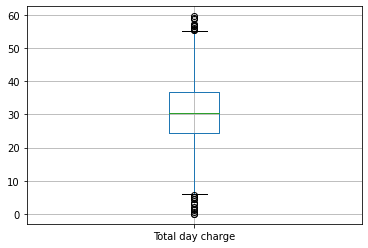

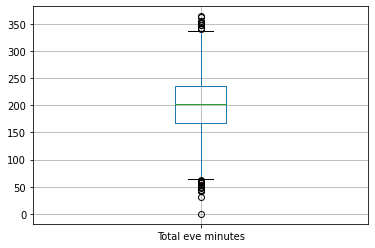

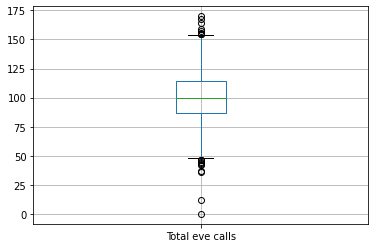

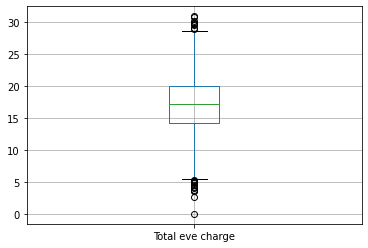

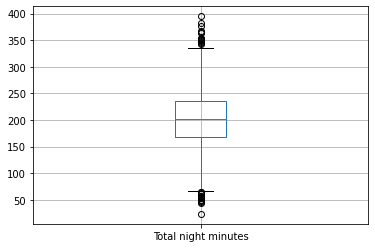

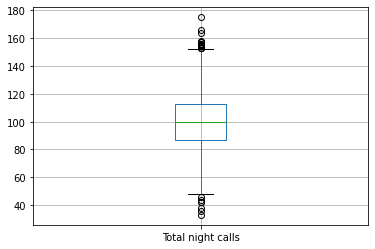

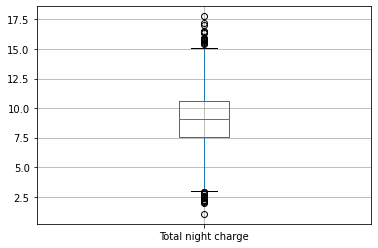

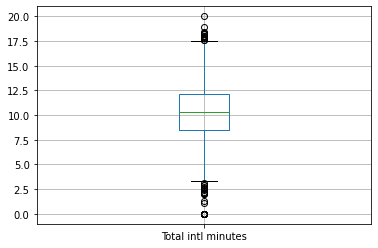

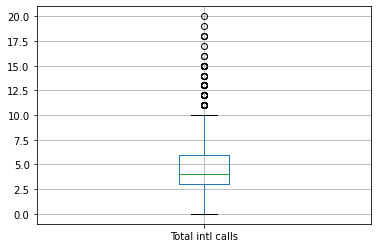

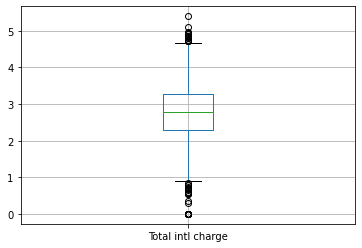

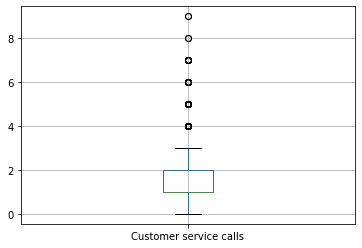

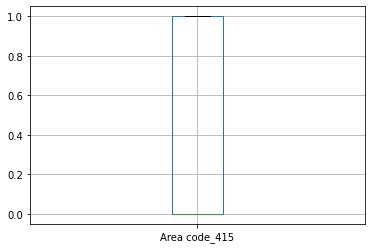

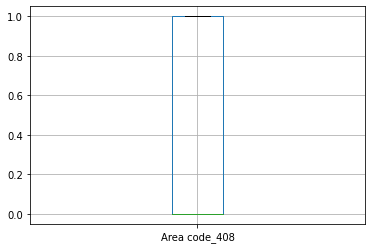

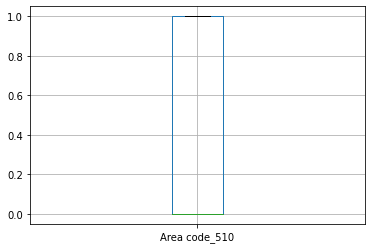

In [30]:
for column in df2:
    plt.figure()
    df1.boxplot([column])

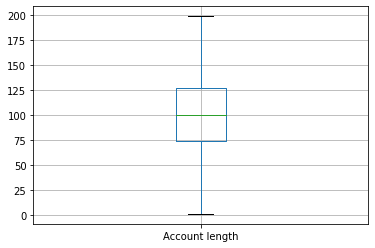

In [31]:
df1 = df2[(df2['Account length']< 200 )]
df1.boxplot(column = (['Account length']))

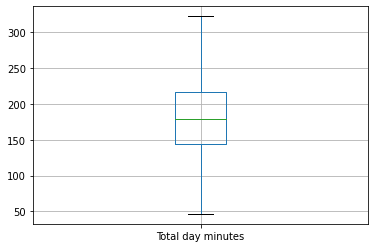

In [32]:
df1 = df2[(df2['Total day minutes']> 45 )& (df2['Total day minutes']< 324 )]
df1.boxplot(column = (['Total day minutes']))

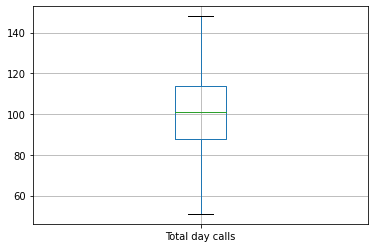

In [33]:
df1 = df2[(df2['Total day calls']> 49  )& (df2['Total day calls']< 149 )]
df1.boxplot(column = (['Total day calls']))

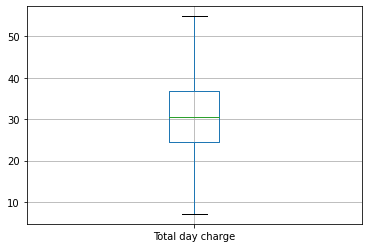

In [34]:
df1 = df2[(df2['Total day charge']> 7  )& (df2['Total day charge']< 55 )]
df1.boxplot(column = (['Total day charge']))

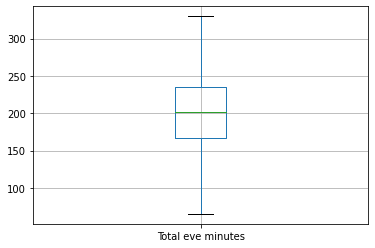

In [35]:
df1 = df2[(df2['Total eve minutes']> 65  )& (df2['Total eve minutes']< 330 )]
df1.boxplot(column = (['Total eve minutes']))

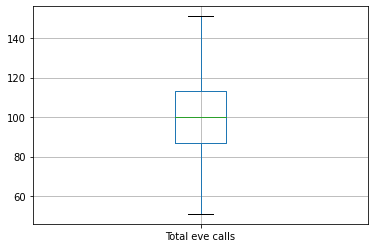

In [36]:
df1 = df2[(df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 )]
df1.boxplot(column = (['Total eve calls']))

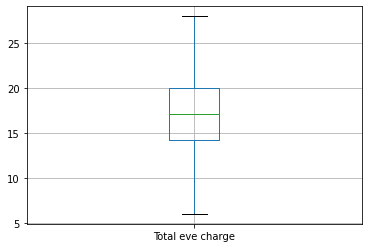

In [37]:
df1 = df2[(df2['Total eve charge']> 6  )& (df2['Total eve charge']< 28 )]
df1.boxplot(column = (['Total eve charge']))

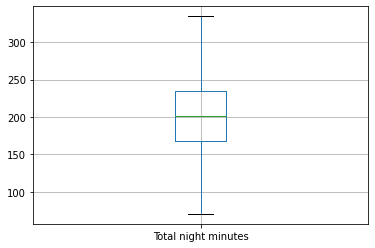

In [38]:
df1 = df2[(df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 )]
df1.boxplot(column = (['Total night minutes']))

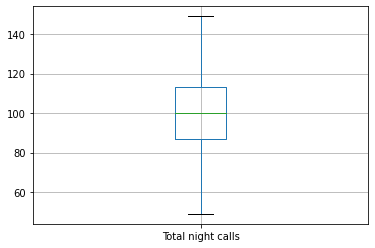

In [39]:
df1 = df2[(df2['Total night calls']> 48 )& (df2['Total night calls']< 150 )]
df1.boxplot(column = (['Total night calls']))

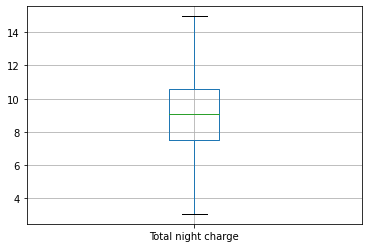

In [40]:
df1 = df2[(df2['Total night charge']> 3 )& (df2['Total night charge']< 15.0 )]
df1.boxplot(column = (['Total night charge']))

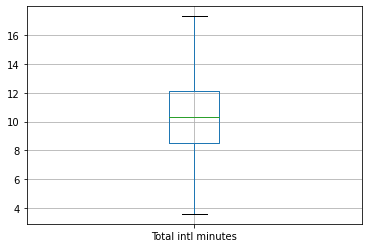

In [41]:
df1 = df2[(df2['Total intl minutes']> 3.5 )& (df2['Total intl minutes']< 17.4 )]
df1.boxplot(column = (['Total intl minutes']))

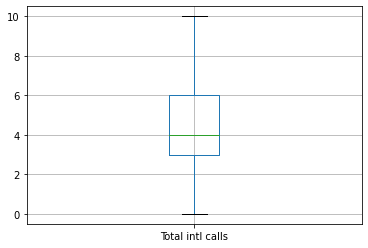

In [42]:
df1 = df2[(df2['Total intl calls']< 10.3 )]
df1.boxplot(column = (['Total intl calls']))

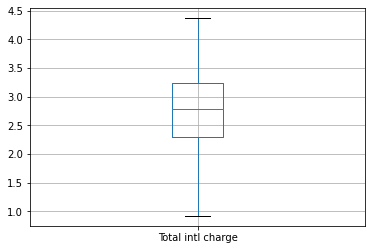

In [43]:
df1 = df2[(df2['Total intl charge']> 0.9 )& (df2['Total intl charge']< 4.4 )]
df1.boxplot(column = (['Total intl charge']))

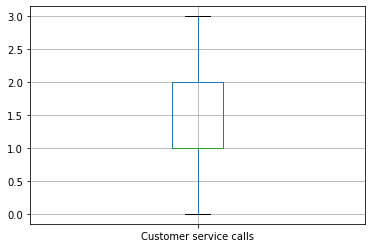

In [44]:
df1 = df2[(df2['Customer service calls']< 3.9)]
df1.boxplot(column = (['Customer service calls']))

In [50]:
df4 = df2[(df2['Account length']< 200 ) & (df2['Total day minutes']> 45 )& (df2['Total day minutes']< 324 ) & (df2['Total day calls']> 49  )& (df2['Total day calls']< 151 ) & (df2['Total day charge']> 7) & (df2['Total day charge']< 55) &  (df2['Total eve minutes']> 65  ) & (df2['Total eve minutes']< 330 ) & (df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 ) & (df2['Total eve charge']> 6  )& (df2['Total eve charge']< 28 ) & (df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 ) & (df2['Total day calls']> 49  ) & (df2['Total day calls']< 149 ) & (df2['Total day charge']> 7  )& (df2['Total day charge']< 55 ) & (df2['Total eve minutes']> 65  )& (df2['Total eve minutes']< 330 ) &  (df2['Total eve calls']> 50  )& (df2['Total eve calls']< 152 ) & (df2['Total eve charge']> 6  ) & (df2['Total eve charge']< 28 ) & (df2['Total night minutes']> 69 )& (df2['Total night minutes']< 340 ) & (df2['Total night calls']> 48 )& (df2['Total night calls']< 150 ) & (df2['Total night charge']> 3 )& (df2['Total night charge']< 15.0 ) & (df2['Total intl minutes']> 3.5 )& (df2['Total intl minutes']< 17.4 ) & (df2['Total intl calls']< 10.3 ) & (df2['Total intl charge']> 0.9 )& (df2['Total intl charge']< 4.4 ) & (df2['Customer service calls']< 3.9)  ]

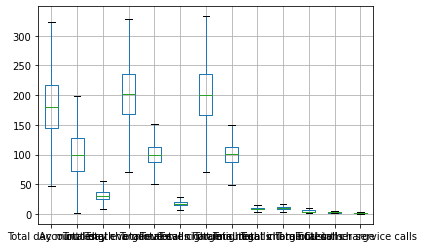

In [46]:
df1.boxplot(column = (['Total day minutes' ,'Account length','Total day charge','Total eve minutes', 'Total eve calls', 'Total eve charge','Total night minutes', 'Total night calls', 'Total night charge','Total intl minutes', 'Total intl calls', 'Total intl charge','Customer service calls']))

In [122]:
outliers = find_outliers_IQR(df1['Account length'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 11
max outlier value: 217.0
min outlier value: 208.0


197     208.0
238     215.0
309     209.0
1045    217.0
1093    210.0
1387    212.0
2150    212.0
2259    210.0
2277    217.0
2700    209.0
3227    209.0
Name: Account length, dtype: float64

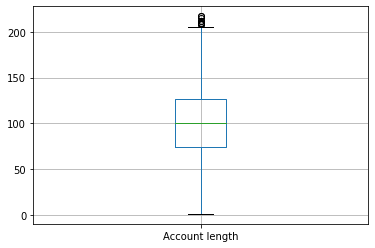

In [125]:
df1.boxplot(column = (['Account length']))

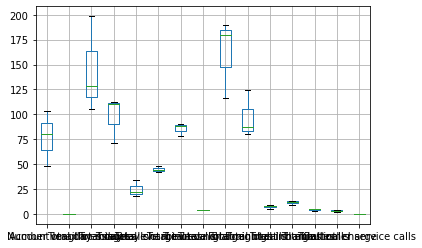

In [292]:
df1.boxplot(column = (['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']))

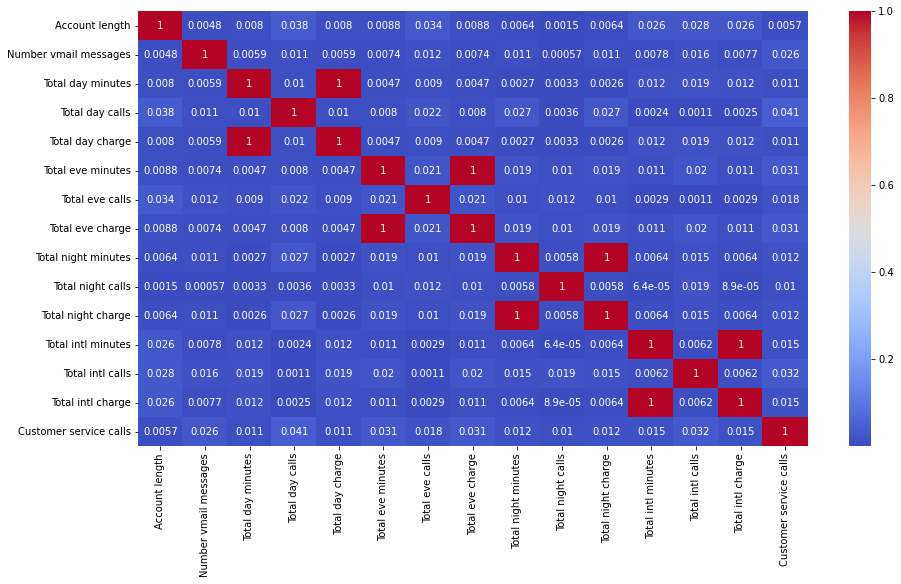

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df1.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0


In [ ]:
df1.drop(columns=(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']),axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


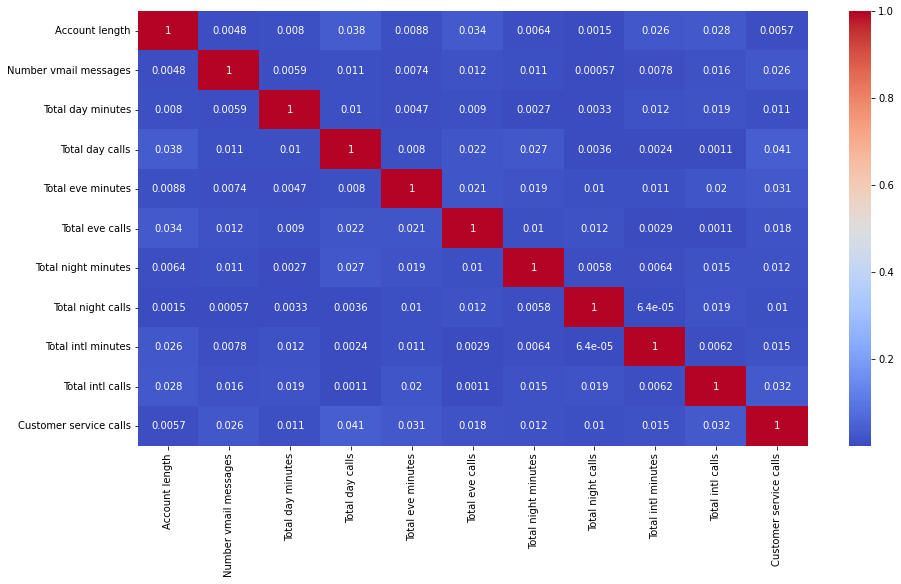

In [ ]:
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [262]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [226]:
numeric_features

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [263]:

lowerbound,upperbound = outlier_treatment(df1['Account length'])
print(lowerbound)
print(upperbound)

-5.5
206.5


In [264]:
df1.drop(df1[ (df1['Account length'] > upperbound) | (df1['Account length'] < lowerbound) ].index , inplace=True)

In [265]:
lowerbound,upperbound = outlier_treatment(df1['Total day minutes'])
print(lowerbound)
print(upperbound)

34.72499999999994
325.32500000000005


In [266]:
df1.drop(df1[ (df1['Total day minutes'] > upperbound) | (df1['Total day minutes'] < lowerbound) ].index , inplace=True)

In [267]:
lowerbound,upperbound = outlier_treatment(df1['Total day calls'])
print(lowerbound)
print(upperbound)

46.5
154.5


In [268]:
df1.drop(df1[ (df1['Total day calls'] > upperbound) | (df1['Total day calls'] < lowerbound) ].index , inplace=True)

In [269]:
lowerbound,upperbound = outlier_treatment(df1['Total day charge'])
print(lowerbound)
print(upperbound)

6.125
55.125


In [270]:
df1.drop(df1[ (df1['Total day charge'] > upperbound) | (df1['Total day charge'] < lowerbound) ].index , inplace=True)

In [272]:
lowerbound,upperbound = outlier_treatment(df1['Total eve minutes'])
print(lowerbound)
print(upperbound)

32.89999999999999
58.10000000000001


In [273]:
df1.drop(df1[ (df1['Total eve minutes'] > upperbound) | (df1['Total eve minutes'] < lowerbound) ].index , inplace=True)

In [274]:
lowerbound,upperbound = outlier_treatment(df1['Total eve calls'])
print(lowerbound)
print(upperbound)

60.75
106.75


In [275]:
df1.drop(df1[ (df1['Total eve calls'] > upperbound) | (df1['Total eve calls'] < lowerbound) ].index , inplace=True)

In [276]:
lowerbound,upperbound = outlier_treatment(df1['Total eve charge'])
print(lowerbound)
print(upperbound)

2.8899999999999997
4.81


In [277]:
df1.drop(df1[ (df1['Total eve charge'] > upperbound) | (df1['Total eve charge'] < lowerbound) ].index , inplace=True)

In [278]:
lowerbound,upperbound = outlier_treatment(df1['Total night minutes'])
print(lowerbound)
print(upperbound)

45.45000000000003
259.44999999999993


In [279]:
df1.drop(df1[ (df1['Total night minutes'] > upperbound) | (df1['Total night minutes'] < lowerbound) ].index , inplace=True)

In [280]:
lowerbound,upperbound = outlier_treatment(df1['Total night calls'])
print(lowerbound)
print(upperbound)

61.5
129.5


In [281]:
df1.drop(df1[ (df1['Total night calls'] > upperbound) | (df1['Total night calls'] < lowerbound) ].index , inplace=True)

In [282]:
lowerbound,upperbound = outlier_treatment(df1['Total night charge'])
print(lowerbound)
print(upperbound)

2.0599999999999996
11.66


In [283]:
df1.drop(df1[ (df1['Total night charge'] > upperbound) | (df1['Total night charge'] < lowerbound) ].index , inplace=True)

In [284]:
lowerbound,upperbound = outlier_treatment(df1['Total intl minutes'])
print(lowerbound)
print(upperbound)

2.6000000000000014
19.4


In [285]:
df1.drop(df1[ (df1['Total intl minutes'] > upperbound) | (df1['Total intl minutes'] < lowerbound) ].index , inplace=True)

In [286]:
lowerbound,upperbound = outlier_treatment(df1['Total intl calls'])
print(lowerbound)
print(upperbound)

0.0
8.0


In [287]:
df1.drop(df1[ (df1['Total intl calls'] > upperbound) | (df1['Total intl calls'] < lowerbound) ].index , inplace=True)

In [288]:
lowerbound,upperbound = outlier_treatment(df1['Total intl charge'])
print(lowerbound)
print(upperbound)

0.31625000000000014
5.24625


In [289]:
df1.drop(df1[ (df1['Total intl charge'] > upperbound) | (df1['Total intl charge'] < lowerbound) ].index , inplace=True)

In [290]:
lowerbound,upperbound = outlier_treatment(df1['Customer service calls'])
print(lowerbound)
print(upperbound)

-0.375
0.625


In [291]:
df1.drop(df1[ (df1['Customer service calls'] > upperbound) | (df1['Customer service calls'] < lowerbound) ].index , inplace=True)

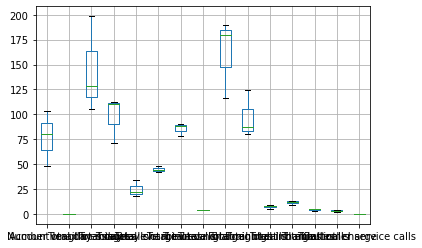

In [293]:
df1.boxplot(column = (['Account length', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls']))

In [224]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [294]:
for col in numeric_features:

  outliers = find_outliers_IQR(df1[col])

  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))

  outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min outlier value: nan
number of outliers: 0
max outlier value: nan
min